# Welcome to the Jupyter notebook accompanying the manuscript "Martingales and the fixation time of high-dimensional evolutionary graphs."

## Travis Monk, International Centre for Neuromorphic Systems, Western Sydney University

This notebook is freely available for all commercial and non-commercial use.  It generates all the figures in the manuscript.  Users may reproduce those figures, or alter parameter vales to explore results on their own.

In Fig. 3 we compare theoretical results with simulations.  The simulation data files are called "kpartite_sims_1.npz" and "kpartite_sims_2.npz".  If these .npz files exist in the same directory as this notebook, then the notebook does not re-execute those simulations.  Instead, Fig. 3 loads those simulation results and plots them to speed computational time.  If users want to re-run simulations anyway, then delete those files from the directory or alter the code so that simulations are always executed.

We use sympy to circumvent laborious algebraic manipulation and solve a system of quartic equations automatically.  Sympy takes most of the computational time.  We elected to use sympy because we want to highlight that our theoretical results are exact, and their parameter dependence is explicit.  To speed computational time, users may instead use a numerical root finder to solve a system of quartic equations for a particular set of parameter values.

The first code block imports all necessary packages and defines various functions.  We briefly describe each of those functions in the comments below:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sympy import *
from sympy.functions import exp
from sympy.utilities.lambdify import lambdify
from os import path

plt.rcParams.update({"text.usetex": True,'font.size': 16})

#returns two triplets of complex functions for a tripartite street graph where
#mutants travel clockwise around the graph.
def clockwise3(r,A,B,C,tau):

    #save parameter values because we re-use the handles in sympy
    params = [r,A,B,C,tau]
    
    #variables we solve for
    fa,fb,fc = symbols('fa fb fc')

    #parameters
    r,A,B,C,tau = symbols('r A B C tau', integer = True, positive = True)

    #E[X|S_t-1] when mutants go clockwise, residents counter-clockwise
    CW_eqs = [r/A*fa*fc*exp(tau) + 1/C*exp(tau) - (r/A + 1/C)*fc,
           r/B*fb*fa*exp(tau) + 1/A*exp(tau) - (r/B + 1/A)*fa,
           r/C*fc*fb*exp(tau) + 1/B*exp(tau) - (r/C + 1/B)*fb]

    #use sympy to solve for fa, fb, fc
    CW = solve(CW_eqs, [fa,fb,fc])

    #turn sympy expression into an evaluatable function
    f = lambdify((r,A,B,C,tau), CW, "numpy")
    functions = f(params[0],params[1],params[2],params[3],params[4]);
    
    #functions contains two sets of triplets.  each set corresponds to one valid martingale.

    fa1 = functions[0][0]; fb1 = functions[0][1]; fc1 = functions[0][2]
    fa2 = functions[1][0]; fb2 = functions[1][1]; fc2 = functions[1][2]
    
    return fa1,fb1,fc1,fa2,fb2,fc2

#same as clockwise3, but mutants travel counter-clockwise around the tripartite graph.
def counterclockwise3(r,A,B,C,tau):

    #save parameter values because we re-use the handles in sympy
    params = [r,A,B,C,tau]
    
    #variables we solve for
    fa,fb,fc = symbols('fa fb fc')

    #parameters
    r,A,B,C,tau = symbols('r A B C tau', integer = True, positive = True)

    #E[X|S_t-1] when mutants go clockwise, residents counter-clockwise
    CCW_eqs = [r/A*fa*fb*exp(tau) + 1/B*exp(tau) - (r/A + 1/B)*fb,
           r/B*fb*fc*exp(tau) + 1/C*exp(tau) - (r/B + 1/C)*fc,
           r/C*fc*fa*exp(tau) + 1/A*exp(tau) - (r/C + 1/A)*fa]

    #use sympy to solve for fa, fb, fc
    CCW = solve(CCW_eqs, [fa,fb,fc])

    #turn sympy expression into an evaluatable function
    f = lambdify((r,A,B,C,tau), CCW, "numpy")
    functions = f(params[0],params[1],params[2],params[3],params[4]);
    
    #functions contains two sets of triplets.  each set corresponds to one valid martingale.

    fa1 = functions[0][0]; fb1 = functions[0][1]; fc1 = functions[0][2]
    fa2 = functions[1][0]; fb2 = functions[1][1]; fc2 = functions[1][2]
    
    return fa1,fb1,fc1,fa2,fb2,fc2

#returns two sets of five complex functions for a 5-partite street graph where
#mutants travel clockwise and residents counter-clockwise.
def clockwise5(r,A,B,C,D,E,tau):

    #save parameter values because we re-use the handles in sympy
    params = [r,A,B,C,D,E,tau]
    
    #variables we solve for
    fa,fb,fc,fd,fe = symbols('fa fb fc fd fe')

    #parameters
    r,A,B,C,D,E,tau = symbols('r A B C D E tau', integer = True, positive = True)

    #E[X|S_t-1] when mutants go clockwise, residents counter-clockwise
    CW5_eqs = [r/A*fa*fe*exp(tau) + 1/E*exp(tau) - (r/A + 1/E)*fe,
           r/B*fb*fa*exp(tau) + 1/A*exp(tau) - (r/B + 1/A)*fa,
           r/C*fc*fb*exp(tau) + 1/B*exp(tau) - (r/C + 1/B)*fb,
           r/D*fd*fc*exp(tau) + 1/C*exp(tau) - (r/D + 1/C)*fc,
           r/E*fe*fd*exp(tau) + 1/D*exp(tau) - (r/E + 1/D)*fd]

    #use sympy to solve for fa, fb, fc
    CW = solve(CW5_eqs, [fa,fb,fc,fd,fe])

    #turn sympy expression into an evaluatable function
    f = lambdify((r,A,B,C,D,E,tau), CW, "numpy")
    funcs = f(params[0],params[1],params[2],params[3],params[4],params[5],params[6]);
    
    #functions contains two sets of triplets.  each set corresponds to one valid martingale.

    fa1 = funcs[0][0]; fb1 = funcs[0][1]; fc1 = funcs[0][2]; fd1 = funcs[0][3]; fe1 = funcs[0][4]
    fa2 = funcs[1][0]; fb2 = funcs[1][1]; fc2 = funcs[1][2]; fd2 = funcs[1][3]; fe2 = funcs[1][4]
    
    return fa1,fb1,fc1,fd1,fe1,fa2,fb2,fc2,fd2,fe2

#calculate fixation probability for a tripartite street graph.
def pfix3(r,A,B,C,Sa0,Sb0,Sc0,fa0,fb0,fc0):
    return (fa0**Sa0*fb0**Sb0*fc0**Sc0 - 1)/(fa0**A*fb0**B*fc0**C - 1)

#calculate fixation probability for 5-partite street graph.
def pfix5(r,A,B,C,D,E,Sa0,Sb0,Sc0,Sd0,Se0,fa0,fb0,fc0,fd0,fe0):
    return (fa0**Sa0*fb0**Sb0*fc0**Sc0*fd0**Sd0*fe0**Se0 - 1)/ \
            (fa0**A*fb0**B*fc0**C*fd0**D*fe0**E - 1)

#CCFs of active steps for tripartite street graph.
def psi3(A,B,C,Sa0,Sb0,Sc0,fa1,fb1,fc1,fa2,fb2,fc2,alpha):
    
    c1 = fa1**Sa0*fb1**Sb0*fc1**Sc0
    c2 = fa2**Sa0*fb2**Sb0*fc2**Sc0
    k1 = fa1**A*fb1**B*fc1**C
    k2 = fa2**A*fb2**B*fc2**C
    
    psia = (c1 - c2)/(alpha*(k1 - k2))
    psib = (c2*k1 - c1*k2)/((1 - alpha)*(k1 - k2))
    
    return psia, psib

#CCFs of active steps for 5-partite street graph
def psi5(A,B,C,D,E,Sa0,Sb0,Sc0,Sd0,Se0, \
         fa1,fb1,fc1,fd1,fe1,fa2,fb2,fc2,fd2,fe2,alpha):
    
    c1 = fa1**Sa0*fb1**Sb0*fc1**Sc0*fd1**Sd0*fe1**Se0
    c2 = fa2**Sa0*fb2**Sb0*fc2**Sc0*fd2**Sd0*fe2**Se0
    k1 = fa1**A*fb1**B*fc1**C*fd1**D*fe1**E
    k2 = fa2**A*fb2**B*fc2**C*fd2**D*fe2**E
    
    psia = (c1 - c2)/(alpha*(k1 - k2))
    psib = (c2*k1 - c1*k2)/((1 - alpha)*(k1 - k2))
    
    return psia, psib

#runs simulations of the Moran process on a tripartite street graph.
#stores conditional fixation and extinction times.
#stores conditional numbers of active steps.
#stores number of trials that achieved fixation and extinction.
#calculates the Fourier transform of simulation results and saves them to file.
def sims(r,A,B,C,Sa0,Sb0,Sc0,tau,trials):

    #store results
    S_fix = 0; C_fix = []; S_ext = 0; C_ext = [];  T_fix = []; T_ext = []

    #define absorbing barriers
    fix = np.array([A,B,C]); ext = np.array([0,0,0])

    for i in range(trials):

        #reset initial conditions
        S = np.array([Sa0,Sb0,Sc0]); Ct = 0; T = 0

        while (not np.array_equal(S,fix) and not np.array_equal(S,ext)):

            #draw a random number
            draw = np.random.uniform()

            #assemble probabilities that translate the random number to change in graph
            #total fitness
            F = r*(S[0] + S[1] + S[2]) + (A-S[0]) + (B-S[1]) + (C-S[2])

            #transition probabilities
            pau = r*S[2]*(A-S[0])/(F*A); pad = (B-S[1])*S[0]/(F*A)
            pbu = r*S[0]*(B-S[1])/(F*B); pbd = (C-S[2])*S[1]/(F*B)
            pcu = r*S[1]*(C-S[2])/(F*C); pcd = (A-S[0])*S[2]/(F*C)
            trans = np.cumsum([pau,pad,pbu,pbd,pcu,pcd,1-pbu-pbd-pau-pad-pcu-pcd])

            #find which transition you picked
            j = next(x[0] for x in enumerate(trans) if x[1] > draw)

            #change in graph and update clocks
            Xa = 1*(j==0) - 1*(j==1)
            Xb = 1*(j==2) - 1*(j==3)
            Xc = 1*(j==4) - 1*(j==5)
            Ct += (j != 6); T += 1

            #update graph
            S[0] += Xa; S[1] += Xb; S[2] += Xc

        #store results
        if np.array_equal(S,fix):
            S_fix += 1; C_fix.append(Ct); T_fix.append(T)
        if np.array_equal(S,ext):
            S_ext += 1; C_ext.append(Ct); T_ext.append(T)
            
    #Fourier transforms of results
    if len(C_fix) > 0:
        cfasim = np.array([np.mean(np.exp(np.array(C_fix)*j)) for j in tau])
        cfaT = np.array([np.mean(np.exp(np.array(T_fix)*j)) for j in tau])
    else:
        cfasim = 0
    if len(C_ext) > 0:
        cfbsim = np.array([np.mean(np.exp(np.array(C_ext)*j)) for j in tau])
        cfbT = np.array([np.mean(np.exp(np.array(T_ext)*j)) for j in tau])
    else:
        cfbsim = 0
            
    return S_fix, S_ext, cfasim, cfbsim, C_fix, C_ext, cfaT, cfbT, T_fix, T_ext

First we make our graphical abstract.

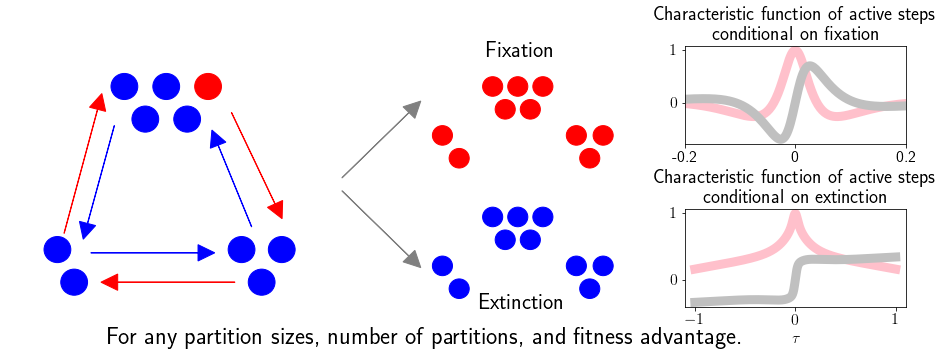

In [2]:
fig, ax = plt.subplots(figsize=(12,6))

ax.set_xlim([-.5,1.5]); ax.set_ylim([0,1]); ax.axis('off')


#state change graph
#plot As
Ax_plot = np.linspace(-.15,.1,5); Ay_plot = np.array([.8,.7,.8,.7,.8])
size = [.04,.04,.04,.04,.04]; color = ['b','b','b','b','r']
[ax.add_artist(plt.Circle((i[0],i[1]), (i[2]), color=i[3])) for i in zip(Ax_plot,Ay_plot,size,color)];

#plot Bs
Bx_plot = np.array([.2,.26,.32]); By_plot = np.array([.3,.2,.3])
size = [.04,.04,.04]; color = ['b','b','b']
[ax.add_artist(plt.Circle((i[0],i[1]), (i[2]), color=i[3])) for i in zip(Bx_plot,By_plot,size,color)];

#plot Cs
Cx_plot = np.array([-.35,-.3]); Cy_plot = np.array([.3,.2])
size = [.04,.04,.04]; color = ['b','b']
[ax.add_artist(plt.Circle((i[0],i[1]), (i[2]), color=i[3])) for i in zip(Cx_plot,Cy_plot,size,color)];

#plot street connections
plt.arrow(.17,.72,.13,-.28,head_width=.05,head_length=.05,color='r')
plt.arrow(.18,.2,-.35,0,head_width=.05,head_length=.05,color='r')
plt.arrow(-.33,.35,.1,.38,head_width=.05,head_length=.05,color='r')
plt.arrow(.23,.37,-.1,.25,head_width=.05,head_length=.05,color='b')
plt.arrow(-.25,.29,.32,0,head_width=.05,head_length=.05,color='b')
plt.arrow(-.18,.68,-.08,-.3,head_width=.05,head_length=.05,color='b')


#fixation graph
#plot As
Ax_plot = np.linspace(-.05,.1,5)+1.; Ay_plot = np.array([.8,.73,.8,.73,.8])
ax.set_xlim([-.5,1.5]); ax.set_ylim([0,1])
[ax.add_artist(plt.Circle((i[0],i[1]),(.03),color='r')) for i in zip(Ax_plot,Ay_plot)];

#plot Bs
Bx_plot = np.array([.2,.24,.28])+1; By_plot = np.array([.3,.23,.3])+.35
ax.set_xlim([-.5,1.5]); ax.set_ylim([0,1])
[ax.add_artist(plt.Circle((i[0],i[1]),(.03),color='r')) for i in zip(Bx_plot,By_plot)];

#plot Cs
Cx_plot = np.array([-.35,-.3])+1.15; Cy_plot = np.array([.3,.23])+.35
size = [.04,.04,.04]; color = ['b','b']
ax.set_xlim([-.5,1.5]); ax.set_ylim([0,1])
[ax.add_artist(plt.Circle((i[0],i[1]),(.03),color='r')) for i in zip(Cx_plot,Cy_plot)];

#extinction graph
#plot As
Ax_plot = np.linspace(-.05,.1,5)+1; Ay_plot = np.array([.8,.73,.8,.73,.8])-.4
ax.set_xlim([-.5,1.5]); ax.set_ylim([0,1])
[ax.add_artist(plt.Circle((i[0],i[1]),(.03),color='b')) for i in zip(Ax_plot,Ay_plot)];

#plot Bs
Bx_plot = np.array([.2,.24,.28])+1; By_plot = np.array([.3,.23,.3])-.05
ax.set_xlim([-.5,1.5]); ax.set_ylim([0,1])
[ax.add_artist(plt.Circle((i[0],i[1]),(.03),color='b')) for i in zip(Bx_plot,By_plot)];

#plot Cs
Cx_plot = np.array([-.35,-.3])+1.15; Cy_plot = np.array([.3,.23])-.05
size = [.04,.04,.04]; color = ['b','b']
ax.set_xlim([-.5,1.5]); ax.set_ylim([0,1])
[ax.add_artist(plt.Circle((i[0],i[1]),(.03),color='b')) for i in zip(Cx_plot,Cy_plot)];

#insert text for fixation and extinction graphs
plt.text(.93,.89,r'Fixation',fontsize=22)
plt.text(.91,.12,r'Extinction',fontsize=22)

plt.arrow(.5,.52,.2,.20,head_width=.05,head_length=.05,color='gray')
plt.arrow(.5,.48,.2,-.20,head_width=.05,head_length=.05,color='gray')

axins1 = inset_axes(ax, width="33%", height="60%",
                   bbox_to_anchor=(1, .6, 1, .5),
                   bbox_transform=ax.transAxes, loc='lower left')

axins2 = inset_axes(ax, width="33%", height="60%",
                   bbox_to_anchor=(1, .1, 1, .5),
                   bbox_transform=ax.transAxes, loc='lower left')

#plot CCFs of CT conditional on fixation and extinction
r = .9; A = 5; B = 3; C = 2; Sa0 = 1; Sb0 = 0; Sc0 = 0; tau=np.linspace(-1,1,1000)*1j
#calculate fixation probability
#evaluate functions at tau = 0
fa1,fb1,fc1,fa2,fb2,fc2 = clockwise3(r,A,B,C,0);
#discard nontrivial solution.  if r < 1 it's one triplet, and if r > 1 it's the other.
fa0,fb0,fc0 = fa2,fb2,fc2

#fixation probability
alpha = pfix3(r,A,B,C,Sa0,Sb0,Sc0,fa0,fb0,fc0); 

#calculate CCFs
#get fa, fb, fc as a function of tau
fa1,fb1,fc1,fa2,fb2,fc2 = clockwise3(r,A,B,C,tau)
psia, psib = psi3(A,B,C,Sa0,Sb0,Sc0,fa1,fb1,fc1,fa2,fb2,fc2,alpha)

#plot psia and psib
axins1.plot(np.imag(tau),np.real(psia),'pink',lw=9)
axins1.plot(np.imag(tau),np.imag(psia),'silver',lw=9)
axins2.plot(np.imag(tau),np.real(psib),'pink',lw=9)
axins2.plot(np.imag(tau),np.imag(psib),'silver',lw=9)

axins1.set_title('Characteristic function of active steps \n conditional on fixation')
axins2.set_title('Characteristic function of active steps \n conditional on extinction')
axins2.set_xlabel(r'$\tau$')
axins1.set_xlim([-.2,.2]); axins1.set_xticks([-.2,0,.2]); axins1.set_yticks([0,1])
axins1.set_xticklabels([-.2,0,.2])
axins2.set_yticks([0,1])

ax.text(-.2,.01,'For any partition sizes, number of partitions, and fitness advantage.',fontsize=24)

plt.savefig('graphicalabstract.pdf',bbox_inches='tight')

Next we reproduce the figures in the main text.  The first figure is a schematic of our street graph

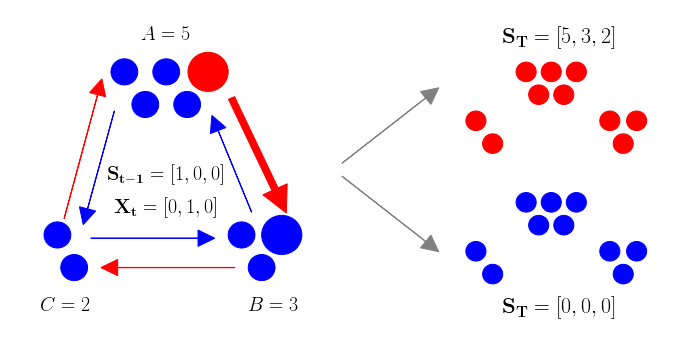

In [3]:
fig, ax = plt.subplots(figsize=(12,6))

ax.set_xlim([-.5,1.5]); ax.set_ylim([0,1]); ax.axis('off')


#state change graph
#plot As
Ax_plot = np.linspace(-.15,.1,5); Ay_plot = np.array([.8,.7,.8,.7,.8])
size = [.04,.04,.04,.04,.06]; color = ['b','b','b','b','r']
[ax.add_artist(plt.Circle((i[0],i[1]), (i[2]), color=i[3])) for i in zip(Ax_plot,Ay_plot,size,color)];

#plot Bs
Bx_plot = np.array([.2,.26,.32]); By_plot = np.array([.3,.2,.3])
size = [.04,.04,.06]; color = ['b','b','b']
[ax.add_artist(plt.Circle((i[0],i[1]), (i[2]), color=i[3])) for i in zip(Bx_plot,By_plot,size,color)];

#plot Cs
Cx_plot = np.array([-.35,-.3]); Cy_plot = np.array([.3,.2])
size = [.04,.04,.04]; color = ['b','b']
[ax.add_artist(plt.Circle((i[0],i[1]), (i[2]), color=i[3])) for i in zip(Cx_plot,Cy_plot,size,color)];

#plot street connections
plt.arrow(.17,.72,.13,-.28,head_width=.08,head_length=.08,width=0.02,color='r')
plt.arrow(.18,.2,-.35,0,head_width=.05,head_length=.05,color='r')
plt.arrow(-.33,.35,.1,.38,head_width=.05,head_length=.05,color='r')
plt.arrow(.23,.37,-.1,.25,head_width=.05,head_length=.05,color='b')
plt.arrow(-.25,.29,.32,0,head_width=.05,head_length=.05,color='b')
plt.arrow(-.18,.68,-.08,-.3,head_width=.05,head_length=.05,color='b')

#insert schematic text
plt.text(-.1,.9,r'$A = 5$',fontsize=20); plt.text(.22,.07,r'$B = 3$',fontsize=20); 
plt.text(-.4,.07,r'$C = 2$',fontsize=20);
plt.text(-.2,.47,r'$\mathbf{S_{t-1}} = [1,0,0]$',fontsize=20)
plt.text(-.18,.37,r'$\mathbf{X_{t}} = [0,1,0]$',fontsize=20)

#fixation graph
#plot As
Ax_plot = np.linspace(-.05,.1,5)+1.1; Ay_plot = np.array([.8,.73,.8,.73,.8])
ax.set_xlim([-.5,1.5]); ax.set_ylim([0,1])
[ax.add_artist(plt.Circle((i[0],i[1]),(.03),color='r')) for i in zip(Ax_plot,Ay_plot)];

#plot Bs
Bx_plot = np.array([.2,.24,.28])+1.1; By_plot = np.array([.3,.23,.3])+.35
ax.set_xlim([-.5,1.5]); ax.set_ylim([0,1])
[ax.add_artist(plt.Circle((i[0],i[1]),(.03),color='r')) for i in zip(Bx_plot,By_plot)];

#plot Cs
Cx_plot = np.array([-.35,-.3])+1.25; Cy_plot = np.array([.3,.23])+.35
size = [.04,.04,.04]; color = ['b','b']
ax.set_xlim([-.5,1.5]); ax.set_ylim([0,1])
[ax.add_artist(plt.Circle((i[0],i[1]),(.03),color='r')) for i in zip(Cx_plot,Cy_plot)];

#extinction graph
#plot As
Ax_plot = np.linspace(-.05,.1,5)+1.1; Ay_plot = np.array([.8,.73,.8,.73,.8])-.4
ax.set_xlim([-.5,1.5]); ax.set_ylim([0,1])
[ax.add_artist(plt.Circle((i[0],i[1]),(.03),color='b')) for i in zip(Ax_plot,Ay_plot)];

#plot Bs
Bx_plot = np.array([.2,.24,.28])+1.1; By_plot = np.array([.3,.23,.3])-.05
ax.set_xlim([-.5,1.5]); ax.set_ylim([0,1])
[ax.add_artist(plt.Circle((i[0],i[1]),(.03),color='b')) for i in zip(Bx_plot,By_plot)];

#plot Cs
Cx_plot = np.array([-.35,-.3])+1.25; Cy_plot = np.array([.3,.23])-.05
size = [.04,.04,.04]; color = ['b','b']
ax.set_xlim([-.5,1.5]); ax.set_ylim([0,1])
[ax.add_artist(plt.Circle((i[0],i[1]),(.03),color='b')) for i in zip(Cx_plot,Cy_plot)];

#insert text for fixation and extinction graphs
plt.text(.98,.89,r'$\mathbf{S_T} = [5,3,2]$',fontsize=22)
plt.text(.98,.06,r'$\mathbf{S_T} = [0,0,0]$',fontsize=22)

plt.arrow(.5,.52,.25,.20,head_width=.05,head_length=.05,color='gray')
plt.arrow(.5,.48,.25,-.20,head_width=.05,head_length=.05,color='gray')

plt.savefig('kpartite_schematic.pdf',bbox_inches='tight')

Fig. 2 plots two sets of three complex functions that yield a product martingale.

Simply call the relevant functions with appropriate parameter values as input.

In [4]:
#evaluate the function for r = 1.5, A = 5, B = 3, C = 2
tau = np.linspace(-1,1,100)*1j
fa1_top,fb1_top,fc1_top,fa2_top,fb2_top,fc2_top = clockwise3(1.5,5,3,2,tau)

#evaluate roots for r = .5
fa1_bot,fb1_bot,fc1_bot,fa2_bot,fb2_bot,fc2_bot = clockwise3(.5,5,3,2,tau)

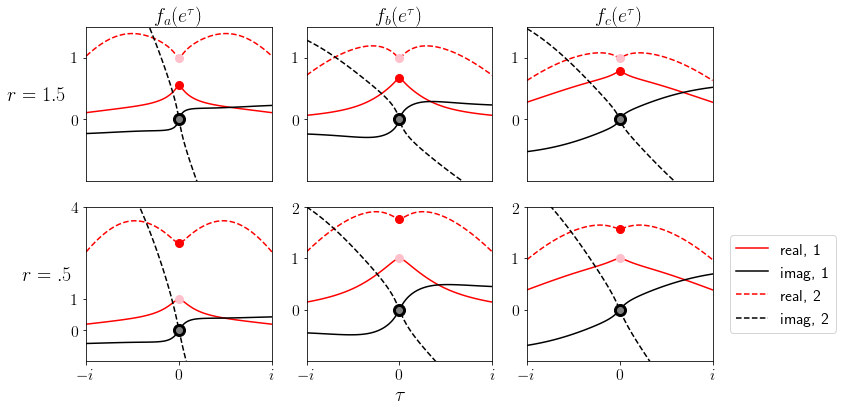

In [5]:
#get the nontrivial values of the functions at tau = 0
A,B,C = 5,3,2; r = 1.5
fa0 = (A+B*r**2+C*r)/(A*r**3+B*r**2+C*r); 
fb0 = (A*r+B+C*r**2)/(A*r+B*r**3+C*r**2);
fc0 = (A*r**2+B*r+C)/(A*r**2+B*r+C*r**3);

plt.figure(figsize=(12,6));
plt.subplot(2,3,1)
plt.plot(np.imag(tau),np.real(fa1_top),'r')
plt.plot(np.imag(tau),np.imag(fa1_top),'k')
plt.plot(np.imag(tau),np.real(fa2_top),'r--')
plt.plot(np.imag(tau),np.imag(fa2_top),'k--')
plt.xlim([-1,1]); plt.xticks([]); plt.ylim([-1,1.5]); plt.yticks([0,1])
plt.title(r'$f_a(e^{\tau})$',fontsize=20)
plt.ylabel(r'$r=1.5$',fontsize=20,rotation=0,labelpad=35)
plt.plot(0,fa0,'ro',markersize=8); plt.plot(0,1,'o',color='pink',markersize=8)
plt.plot(0,0,'ko',markersize=12); plt.plot(0,0,'o',color='gray',markersize=6)

plt.subplot(2,3,2)
plt.plot(np.imag(tau),np.real(fb1_top),'r')
plt.plot(np.imag(tau),np.imag(fb1_top),'k')
plt.plot(np.imag(tau),np.real(fb2_top),'r--')
plt.plot(np.imag(tau),np.imag(fb2_top),'k--')
plt.xlim([-1,1]); plt.xticks([]); plt.ylim([-1,1.5]); plt.yticks([0,1])
plt.title(r'$f_b(e^{\tau})$',fontsize=20)
plt.plot(0,fb0,'ro',markersize=8); plt.plot(0,1,'o',color='pink',markersize=8)
plt.plot(0,0,'ko',markersize=12); plt.plot(0,0,'o',color='gray',markersize=6)

plt.subplot(2,3,3)
plt.plot(np.imag(tau),np.real(fc1_top),'r')
plt.plot(np.imag(tau),np.imag(fc1_top),'k')
plt.plot(np.imag(tau),np.real(fc2_top),'r--')
plt.plot(np.imag(tau),np.imag(fc2_top),'k--')
plt.xlim([-1,1]); plt.xticks([]); plt.ylim([-1,1.5]); plt.yticks([0,1])
plt.title(r'$f_c(e^{\tau})$',fontsize=20)
plt.plot(0,fc0,'ro',markersize=8); plt.plot(0,1,'o',color='pink',markersize=8)
plt.plot(0,0,'ko',markersize=12); plt.plot(0,0,'o',color='gray',markersize=6)

#update the nontrivial values of the functions at tau = 0 for new value of r
r = .5
fa0 = (A+B*r**2+C*r)/(A*r**3+B*r**2+C*r); 
fb0 = (A*r+B+C*r**2)/(A*r+B*r**3+C*r**2);
fc0 = (A*r**2+B*r+C)/(A*r**2+B*r+C*r**3);

plt.subplot(2,3,4)
plt.plot(np.imag(tau),np.real(fa1_bot),'r')
plt.plot(np.imag(tau),np.imag(fa1_bot),'k')
plt.plot(np.imag(tau),np.real(fa2_bot),'r--')
plt.plot(np.imag(tau),np.imag(fa2_bot),'k--')
plt.xlim([-1,1]); plt.xticks([-1,0,1],[r'$-i$',r'$0$',r'$i$']);
plt.ylim([-1,4]); plt.yticks([0,1,4]);
plt.ylabel(r'$r=.5$',fontsize=20,rotation=0,labelpad=25)
plt.plot(0,fa0,'ro',markersize=8); plt.plot(0,1,'o',color='pink',markersize=8)
plt.plot(0,0,'ko',markersize=12); plt.plot(0,0,'o',color='gray',markersize=6)

plt.subplot(2,3,5)
plt.plot(np.imag(tau),np.real(fb1_bot),'r')
plt.plot(np.imag(tau),np.imag(fb1_bot),'k')
plt.plot(np.imag(tau),np.real(fb2_bot),'r--')
plt.plot(np.imag(tau),np.imag(fb2_bot),'k--')
plt.xlim([-1,1]); plt.xticks([-1,0,1],[r'$-i$',r'$0$',r'$i$']);
plt.ylim([-1,2]); plt.yticks([0,1,2]);
plt.xlabel(r'$\tau$',fontsize=20)
plt.plot(0,fb0,'ro',markersize=8); plt.plot(0,1,'o',color='pink',markersize=8)
plt.plot(0,0,'ko',markersize=12); plt.plot(0,0,'o',color='gray',markersize=6)

plt.subplot(2,3,6)
plt.plot(np.imag(tau),np.real(fc1_bot),'r',label='real, 1')
plt.plot(np.imag(tau),np.imag(fc1_bot),'k',label='imag, 1')
plt.plot(np.imag(tau),np.real(fc2_bot),'r--',label='real, 2')
plt.plot(np.imag(tau),np.imag(fc2_bot),'k--',label='imag, 2')
plt.xlim([-1,1]); plt.xticks([-1,0,1],[r'$-i$',r'$0$',r'$i$']);
plt.ylim([-1,2]); plt.yticks([0,1,2]);
plt.plot(0,fc0,'ro',markersize=8); plt.plot(0,1,'o',color='pink',markersize=8)
plt.plot(0,0,'ko',markersize=12); plt.plot(0,0,'o',color='gray',markersize=6)
plt.legend(loc='center left',bbox_to_anchor=(1.05, .5))

plt.tight_layout()
plt.savefig('kpartite_roots.pdf')

Fig. 3 compares CCFs of $C_T$ for the tripartite street graph in Fig. 1 to simulation results.

If simulation results do not exist in the same file directory as this notebook, then we will run the simulations.

If simulation results do exist, move or delete them to run new simulations with different parameter values.  Theoretical CCFs will be automatically updated by loading the simulation parameter values from file.

In [6]:
if not path.exists("kpartite_sims_1.npz"):

    r = 1.5; A = 5; B = 3; C = 2; Sa0 = 1; Sb0 = 0; Sc0 = 0; tau=np.linspace(-1,1,1000)*1j
    trials = 200000
    S_fix, S_ext, cfasim, cfbsim, C_fix, C_ext, cfaT, cfbT, T_fix, T_ext = sims(r,A,B,C,Sa0,Sb0,Sc0,tau,trials)
    np.savez("kpartite_sims_1.npz",S_fix=S_fix,S_ext=S_ext,cfasim=cfasim,cfbsim=cfbsim,C_fix=C_fix,C_ext=C_ext,\
             A=A,B=B,C=C,r=r,Sa0=Sa0,Sb0=Sb0,Sc0=Sc0,tau=tau,T_fix=T_fix,T_ext=T_ext)
    
if not path.exists("kpartite_sims_2.npz"):

    r = .9; A = 5; B = 3; C = 2; Sa0 = 1; Sb0 = 0; Sc0 = 0; tau=np.linspace(-1,1,1000)*1j
    trials = 200000
    S_fix, S_ext, cfasim, cfbsim, C_fix, C_ext, cfaT, cfbT, T_fix, T_ext = sims(r,A,B,C,Sa0,Sb0,Sc0,tau,trials)
    np.savez("kpartite_sims_2.npz",S_fix=S_fix,S_ext=S_ext,cfasim=cfasim,cfbsim=cfbsim,C_fix=C_fix,C_ext=C_ext,\
             A=A,B=B,C=C,r=r,Sa0=Sa0,Sb0=Sb0,Sc0=Sc0,tau=tau,T_fix=T_fix,T_ext=T_ext)

Next load simulation results and call relevant functions to find theoretical results for CCFs of $C_T$.

In [7]:
#compare simulations and theory for two values of r
cfa = []; cfb = []; CCFa = []; CCFb = []; tau = []; 
#theory and simulation fixation probabilities
p = []; sim_p = []
#visualise conditional first and second moments
EC_ext = []; EC2_ext = []; EC_fix = []; EC2_fix = []

for i in range(1,3):
    
    with np.load("kpartite_sims_" + str(i) + ".npz") as data:
        S_fix = data['S_fix']; S_ext = data['S_ext']; cfasim = data['cfasim']; cfbsim = data['cfbsim'];
        C_fix = data['C_fix']; C_ext = data['C_ext'];
        A = data['A']; B = data['B']; C = data['C']; r = data['r']; 
        Sa0 = data['Sa0']; Sb0 = data['Sb0']; Sc0 = data['Sc0']; t = data['tau']
        
    #calculate conditional first and second moments of simulation data
    EC_ext.append(np.mean(C_ext)); EC_fix.append(np.mean(C_fix))
    EC2_ext.append(np.mean([i**2 for i in C_ext])); EC2_fix.append(np.mean([i**2 for i in C_fix]))

    cfa.append(cfasim); cfb.append(cfbsim); tau.append(t)
        
    #calculate fixation probability
    #evaluate functions at tau = 0
    fa1,fb1,fc1,fa2,fb2,fc2 = clockwise3(r,A,B,C,0);
    #discard nontrivial solution.  if r < 1 it's one triplet, and if r > 1 it's the other.
    if i == 1:
        fa0,fb0,fc0 = fa1,fb1,fc1
    if i == 2:
        fa0,fb0,fc0 = fa2,fb2,fc2
    #fixation probability
    alpha = pfix3(r,A,B,C,Sa0,Sb0,Sc0,fa0,fb0,fc0); 
    p.append(alpha); sim_p.append(S_fix/(S_fix + S_ext))

    #calculate CCFs
    #get fa, fb, fc as a function of tau
    fa1,fb1,fc1,fa2,fb2,fc2 = clockwise3(r,A,B,C,t)

    psia, psib = psi3(A,B,C,Sa0,Sb0,Sc0,fa1,fb1,fc1,fa2,fb2,fc2,alpha)
    
    CCFa.append(psia); CCFb.append(psib)

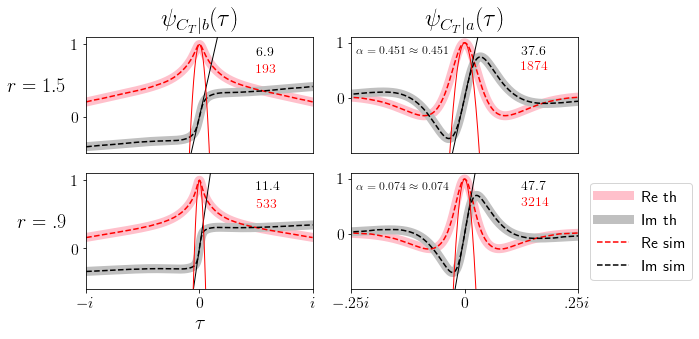

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.plot(np.imag(tau[0]),np.real(CCFb[0]),'pink',lw=9)
plt.plot(np.imag(tau[0]),np.imag(CCFb[0]),'silver',lw=9)
plt.plot(np.imag(tau[0]),np.real(cfb[0]),'r--')
plt.plot(np.imag(tau[0]),np.imag(cfb[0]),'k--')
plt.plot(np.imag(tau[0]),np.imag(tau[0])*EC_ext[0],'k-',lw=1)
plt.plot(np.imag(tau[0]),-EC2_ext[0]*np.imag(tau[0])**2+1,'r-',lw=1)
plt.ylabel(r'$r=1.5$',fontsize=20,rotation=0,labelpad=35)
plt.xlim([-1,1]); plt.xticks([]); plt.ylim([-.5,1.1]); plt.yticks([0,1])
plt.title(r'$\psi_{C_T|b}(\tau)$',fontsize=24,pad=13)
plt.text(.5,.85 ,r'${}$'.format(round(EC_ext[0],1)),fontsize=14)
plt.text(.5,.6 ,r'${}$'.format(int(EC2_ext[0])),fontsize=14,color='r')

plt.subplot(2,2,2)
plt.plot(np.imag(tau[0]),np.real(CCFa[0]),'pink',lw=9)
plt.plot(np.imag(tau[0]),np.imag(CCFa[0]),'silver',lw=9)
plt.plot(np.imag(tau[0]),np.real(cfa[0]),'r--')
plt.plot(np.imag(tau[0]),np.imag(cfa[0]),'k--')
plt.plot(np.imag(tau[0]),np.imag(tau[0])*EC_fix[0],'k-',lw=1)
plt.plot(np.imag(tau[0]),-EC2_fix[0]*np.imag(tau[0])**2+1,'r-',lw=1)
plt.xlim([-.25,.25]); plt.xticks([]); plt.ylim([-1,1.1]); plt.yticks([0,1])
plt.title(r'$\psi_{C_T|a}(\tau)$',fontsize=24,pad=13)
plt.text(.125,.8 ,r'${}$'.format(round(EC_fix[0],1)),fontsize=14)
plt.text(.125,.5 ,r'${}$'.format(int(EC2_fix[0])),fontsize=14,color='r')

#compare fixation probability with simulations
alpha = pfix3(r,A,B,C,Sa0,Sb0,Sc0,fa0,fb0,fc0)
sim_alpha = S_fix/(S_fix + S_ext)
plt.text(-.24,.8,r'$\alpha = {} \approx $'.format(round(p[0],3)) + ' ' + r'$ {}$'.format(round(sim_p[0],3)),
         fontsize=12)

plt.subplot(2,2,3)
plt.plot(np.imag(tau[1]),np.real(CCFb[1]),'pink',lw=9)
plt.plot(np.imag(tau[1]),np.imag(CCFb[1]),'silver',lw=9)
plt.plot(np.imag(tau[1]),np.real(cfb[1]),'r--')
plt.plot(np.imag(tau[1]),np.imag(cfb[1]),'k--')
plt.plot(np.imag(tau[1]),np.imag(tau[1])*EC_ext[1],'k-',lw=1)
plt.plot(np.imag(tau[1]),-EC2_ext[1]*np.imag(tau[1])**2+1,'r-',lw=1)
plt.xlim([-1,1]); plt.xticks([-1,0,1],[r'$-i$',r'$0$',r'$i$']);
plt.ylim([-.6,1.1]); plt.yticks([0,1]);
plt.ylabel(r'$r=.9$',fontsize=20,rotation=0,labelpad=30)
plt.xlabel(r'$\tau$',fontsize=20)
plt.text(.5,.85 ,r'${}$'.format(round(EC_ext[1],1)),fontsize=14)
plt.text(.5,.6 ,r'${}$'.format(int(EC2_ext[1])),fontsize=14,color='r')

plt.subplot(2,2,4)
plt.plot(np.imag(tau[1]),np.real(CCFa[1]),'pink',lw=9,label='Re th')
plt.plot(np.imag(tau[1]),np.imag(CCFa[1]),'silver',lw=9,label='Im th')
plt.plot(np.imag(tau[1]),np.real(cfa[1]),'r--',label='Re sim')
plt.plot(np.imag(tau[1]),np.imag(cfa[1]),'k--',label='Im sim')
plt.plot(np.imag(tau[1]),np.imag(tau[1])*EC_fix[1],'k-',lw=1)
plt.plot(np.imag(tau[1]),-EC2_fix[1]*np.imag(tau[1])**2+1,'r-',lw=1)
plt.xlim([-.25,.25]); plt.xticks([-.25,0,.25],[r'$-.25i$',r'$0$',r'$.25i$']);
plt.ylim([-1,1.1]); plt.yticks([0,1]);
plt.legend(loc='center left',bbox_to_anchor=(1.02,.5))
plt.text(.125,.8 ,r'${}$'.format(round(EC_fix[1],1)),fontsize=14)
plt.text(.125,.5 ,r'${}$'.format(int(EC2_fix[1])),fontsize=14,color='r')

#compare fixation probability with simulations
alpha = pfix3(r,A,B,C,Sa0,Sb0,Sc0,fa0,fb0,fc0)
sim_alpha = S_fix/(S_fix + S_ext)
plt.text(-.24,.8,r'$\alpha = {} \approx $'.format(round(p[1],3)) + ' ' + r'$ {}$'.format(round(sim_p[1],3)),
         fontsize=12)

plt.tight_layout()
plt.savefig('kpartite_theory_sims.pdf')

Fig. 4 reverses the direction that offspring travel around the graph.

Simply call the relevant functions and plot the CCFs of $C_T$.

In [9]:
#compare clockwise to counterclockwise mutant rotation around graph, each for 2 values of r
#we calculate 4 CCFs:  clockwise r = 1.01 and 3, then counterclockwise r = 1.01 and 3.

r_store = [1.01,3.,1.01,3.]; 
A = 5; B = 3; C = 1; Sa0 = 1; Sb0 = 0; Sc0 = 0
cfa = []; cfb = []; CCFa = []; CCFb = []; tau = np.linspace(-2,2,10000)*1j

for i in range(4):
       
    r = r_store[i]
    #calculate fixation probability
    #evaluate functions at tau = 0
    if i < 2:
        fa1,fb1,fc1,fa2,fb2,fc2 = clockwise3(r,A,B,C,0);
    if i >= 2:
        fa1,fb1,fc1,fa2,fb2,fc2 = counterclockwise3(r,A,B,C,0);

    #discard nontrivial solution.
    fa0,fb0,fc0 = fa1,fb1,fc1
    #fixation probability
    alpha = pfix3(r,A,B,C,Sa0,Sb0,Sc0,fa0,fb0,fc0)
    
    #calculate CCFs
    if i < 2:
        fa1,fb1,fc1,fa2,fb2,fc2 = clockwise3(r,A,B,C,tau)
    if i >= 2:
        fa1,fb1,fc1,fa2,fb2,fc2 = counterclockwise3(r,A,B,C,tau)
        
    psia, psib = psi3(A,B,C,Sa0,Sb0,Sc0,fa1,fb1,fc1,fa2,fb2,fc2,alpha)
    CCFa.append(psia); CCFb.append(psib)

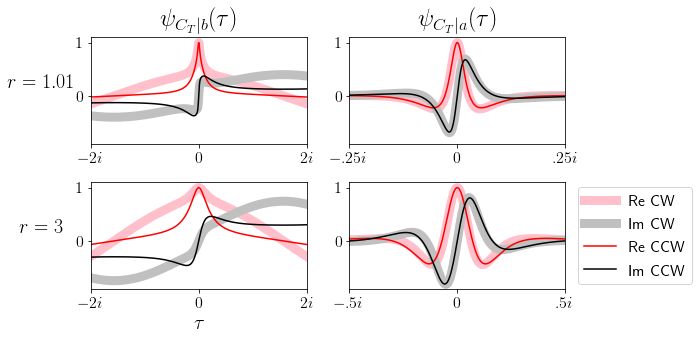

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.plot(np.imag(tau),np.real(CCFb[0]),'pink',lw=9)
plt.plot(np.imag(tau),np.imag(CCFb[0]),'silver',lw=9)
plt.plot(np.imag(tau),np.real(CCFb[2]),'r-')
plt.plot(np.imag(tau),np.imag(CCFb[2]),'k-')
plt.ylabel(r'$r=1.01$',fontsize=20,rotation=0,labelpad=35)
plt.xlim([-2,2]); plt.xticks([-2,0,2],[r'$-2i$',r'$0$',r'$2i$']); plt.ylim([-.9,1.1]); plt.yticks([0,1])
plt.title(r'$\psi_{C_T|b}(\tau)$',fontsize=24,pad=13)

plt.subplot(2,2,2)
plt.plot(np.imag(tau),np.real(CCFa[0]),'pink',lw=9)
plt.plot(np.imag(tau),np.imag(CCFa[0]),'silver',lw=9)
plt.plot(np.imag(tau),np.real(CCFa[2]),'r-')
plt.plot(np.imag(tau),np.imag(CCFa[2]),'k-')
plt.xlim([-.25,.25]); plt.xticks([-.25,0,.25],[r'$-.25i$',r'$0$',r'$.25i$']); plt.ylim([-.9,1.1]); plt.yticks([0,1])
plt.title(r'$\psi_{C_T|a}(\tau)$',fontsize=24,pad=13)

plt.subplot(2,2,3)
plt.plot(np.imag(tau),np.real(CCFb[1]),'pink',lw=9)
plt.plot(np.imag(tau),np.imag(CCFb[1]),'silver',lw=9)
plt.plot(np.imag(tau),np.real(CCFb[3]),'r-')
plt.plot(np.imag(tau),np.imag(CCFb[3]),'k-')
plt.ylabel(r'$r=3$',fontsize=20,rotation=0,labelpad=35)
plt.xlim([-2,2]); plt.xticks([-2,0,2],[r'$-2i$',r'$0$',r'$2i$']); plt.ylim([-.9,1.1]); plt.yticks([0,1])
plt.xlabel(r'$\tau$',fontsize=20)

plt.subplot(2,2,4)
plt.plot(np.imag(tau),np.real(CCFa[1]),'pink',lw=9,label='Re CW')
plt.plot(np.imag(tau),np.imag(CCFa[1]),'silver',lw=9,label='Im CW')
plt.plot(np.imag(tau),np.real(CCFa[3]),'r-',label='Re CCW')
plt.plot(np.imag(tau),np.imag(CCFa[3]),'k-',label='Im CCW')
plt.xlim([-.25,.25]); plt.xticks([-.5,0,.5],[r'$-.5i$',r'$0$',r'$.5i$']); 
plt.ylim([-.9,1.1]); plt.yticks([0,1]);
plt.legend(loc='center left',bbox_to_anchor=(1.02,.5))

plt.tight_layout()
plt.savefig('CW_CCW.pdf')

Fig. 5 varies the population sizes in each partition while keeping the total population size over all partitions constant.

We make lists for partition sizes A, B, and C, and iterate over them, calling relevant functions to obtain the CCFs.

In [11]:
#compare isothermal and funnel graphs by changing A,B,C.
r = 2.; 
Sa0 = 0; Sb0 = 1; Sc0 = 0
A_store = [10,6,4]; B_store = [1,3,4]; C_store = [1,3,4]
cfa = []; cfb = []; CCFa = []; CCFb = []; tau = np.linspace(-2,2,10000)*1j

for i in range(3):
       
    A = A_store[i]; B = B_store[i]; C = C_store[i]
    
    #calculate fixation probability
    #evaluate functions at tau = 0
    fa1,fb1,fc1,fa2,fb2,fc2 = clockwise3(r,A,B,C,0);

    #discard nontrivial solution.
    fa0,fb0,fc0 = fa1,fb1,fc1
    #fixation probability
    alpha = pfix3(r,A,B,C,Sa0,Sb0,Sc0,fa0,fb0,fc0)
    
    #calculate CCFs
    fa1,fb1,fc1,fa2,fb2,fc2 = clockwise3(r,A,B,C,tau)
        
    psia, psib = psi3(A,B,C,Sa0,Sb0,Sc0,fa1,fb1,fc1,fa2,fb2,fc2,alpha)
    CCFa.append(psia); CCFb.append(psib)

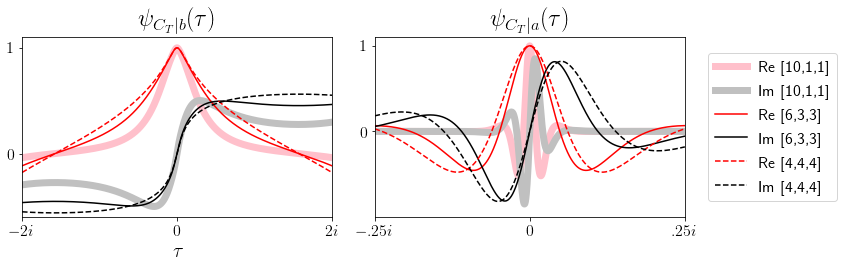

In [12]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(np.imag(tau),np.real(CCFb[0]),'pink',lw=7)
plt.plot(np.imag(tau),np.imag(CCFb[0]),'silver',lw=7)
plt.plot(np.imag(tau),np.real(CCFb[1]),'r-')
plt.plot(np.imag(tau),np.imag(CCFb[1]),'k-')
plt.plot(np.imag(tau),np.real(CCFb[2]),'r--')
plt.plot(np.imag(tau),np.imag(CCFb[2]),'k--')
plt.xlim([-2,2]); plt.xticks([-2,0,2],[r'$-2i$',r'$0$',r'$2i$']); plt.ylim([-.6,1.1]); plt.yticks([0,1])
plt.title(r'$\psi_{C_T|b}(\tau)$',fontsize=24,pad=13)
plt.xlabel(r'$\tau$',fontsize=20)

plt.subplot(1,2,2)
plt.plot(np.imag(tau),np.real(CCFa[0]),'pink',lw=7,label='Re [10,1,1]')
plt.plot(np.imag(tau),np.imag(CCFa[0]),'silver',lw=7,label='Im [10,1,1]')
plt.plot(np.imag(tau),np.real(CCFa[1]),'r-',label='Re [6,3,3]')
plt.plot(np.imag(tau),np.imag(CCFa[1]),'k-',label='Im [6,3,3]')
plt.plot(np.imag(tau),np.real(CCFa[2]),'r--',label='Re [4,4,4]')
plt.plot(np.imag(tau),np.imag(CCFa[2]),'k--',label='Im [4,4,4]')
plt.xlim([-.25,.25]); plt.xticks([-.25,0,.25],[r'$-.25i$',r'$0$',r'$.25i$']); plt.ylim([-1,1.1]); plt.yticks([0,1])
plt.title(r'$\psi_{C_T|a}(\tau)$',fontsize=24,pad=13)
plt.legend(loc='center left',bbox_to_anchor=(1.05,.5))

plt.tight_layout()
plt.savefig('funnel_1.pdf')

Fig. 6 is the same as Fig. 5, but we move the initial mutant to partition C.

In [13]:
#again compare isothermal and funnel graphs, but move the initial mutant to partition C
r = 2.; 
Sa0 = 0; Sb0 = 0; Sc0 = 1
A_store = [10,6,4]; B_store = [1,3,4]; C_store = [1,3,4]
cfa = []; cfb = []; CCFa = []; CCFb = []; tau = np.linspace(-2,2,10000)*1j

for i in range(3):
       
    A = A_store[i]; B = B_store[i]; C = C_store[i]
    
    #calculate fixation probability
    #evaluate functions at tau = 0
    fa1,fb1,fc1,fa2,fb2,fc2 = clockwise3(r,A,B,C,0);

    #discard nontrivial solution.
    fa0,fb0,fc0 = fa1,fb1,fc1
    #fixation probability
    alpha = pfix3(r,A,B,C,Sa0,Sb0,Sc0,fa0,fb0,fc0)
    
    #calculate CCFs
    fa1,fb1,fc1,fa2,fb2,fc2 = clockwise3(r,A,B,C,tau)
        
    psia, psib = psi3(A,B,C,Sa0,Sb0,Sc0,fa1,fb1,fc1,fa2,fb2,fc2,alpha)
    CCFa.append(psia); CCFb.append(psib)

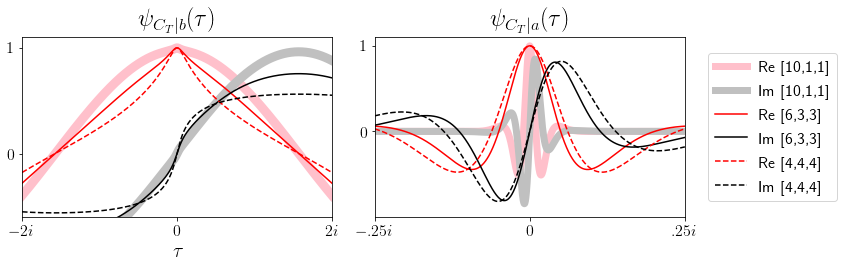

In [14]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(np.imag(tau),np.real(CCFb[0]),'pink',lw=9)
plt.plot(np.imag(tau),np.imag(CCFb[0]),'silver',lw=9)
plt.plot(np.imag(tau),np.real(CCFb[1]),'r-')
plt.plot(np.imag(tau),np.imag(CCFb[1]),'k-')
plt.plot(np.imag(tau),np.real(CCFb[2]),'r--')
plt.plot(np.imag(tau),np.imag(CCFb[2]),'k--')
plt.xlim([-2,2]); plt.xticks([-2,0,2],[r'$-2i$',r'$0$',r'$2i$']); plt.ylim([-.6,1.1]); plt.yticks([0,1])
plt.title(r'$\psi_{C_T|b}(\tau)$',fontsize=24,pad=13)
plt.xlabel(r'$\tau$',fontsize=20)

plt.subplot(1,2,2)
plt.plot(np.imag(tau),np.real(CCFa[0]),'pink',lw=7,label='Re [10,1,1]')
plt.plot(np.imag(tau),np.imag(CCFa[0]),'silver',lw=7,label='Im [10,1,1]')
plt.plot(np.imag(tau),np.real(CCFa[1]),'r-',label='Re [6,3,3]')
plt.plot(np.imag(tau),np.imag(CCFa[1]),'k-',label='Im [6,3,3]')
plt.plot(np.imag(tau),np.real(CCFa[2]),'r--',label='Re [4,4,4]')
plt.plot(np.imag(tau),np.imag(CCFa[2]),'k--',label='Im [4,4,4]')
plt.xlim([-.25,.25]); plt.xticks([-.25,0,.25],[r'$-.25i$',r'$0$',r'$.25i$']); plt.ylim([-1,1.1]); plt.yticks([0,1])
plt.title(r'$\psi_{C_T|a}(\tau)$',fontsize=24,pad=13)
plt.legend(loc='center left',bbox_to_anchor=(1.05,.5))

plt.tight_layout()
plt.savefig('funnel_2.pdf')

Fig. 7 shows the effect of dividing a population into 5 partitions.  We compare the CCFs of $C_T$ for a street graph with 3 or 5 partitions.

Sympy takes a long time to calculate the two sets of 5 complex functions that yield a martingale.  We save those functions in a file called "analytical_3_5.npz".  So if sympy has already calculated those functions for some parameter values, we do not waste time calculating them again.  We just load those results and plot them directly.

Again, we chose to use sympy to highlight that our results are exact.  But users who want to improve computational speed of the notebook may instead choose to utilise a numerical root finder.

In [15]:
#compare the effect of partitioning individuals into 3 or 5 partitions

if not path.exists("analytical_3_5.npz"):
    
    r = 2.; 
    tau = np.linspace(-2,2,10000)*1j

    #3 partitions
    Sa0,Sb0,Sc0 = 1,0,0; A,B,C = 24,12,12
    fa1,fb1,fc1,fa2,fb2,fc2 = clockwise3(r,A,B,C,0);
    fa0,fb0,fc0 = fa1,fb1,fc1
    alpha = pfix3(r,A,B,C,Sa0,Sb0,Sc0,fa0,fb0,fc0)
    fa1,fb1,fc1,fa2,fb2,fc2 = clockwise3(r,A,B,C,tau)
    CCFa3, CCFb3 = psi3(A,B,C,Sa0,Sb0,Sc0,fa1,fb1,fc1,fa2,fb2,fc2,alpha)

    #5 partitions
    Sa0,Sb0,Sc0,Sd0,Se0 = 1,0,0,0,0; A,B,C,D,E = 24,6,6,6,6
    fa1,fb1,fc1,fd1,fe1,fa2,fb2,fc2,fd2,fe2 = clockwise5(r,A,B,C,D,E,0);
    fa0,fb0,fc0,fd0,fe0 = fa1,fb1,fc1,fd1,fe1
    alpha = pfix5(r,A,B,C,D,E,Sa0,Sb0,Sc0,Sd0,Se0,fa0,fb0,fc0,fd0,fe0)
    fa1,fb1,fc1,fd1,fe1,fa2,fb2,fc2,fd2,fe2 = clockwise5(r,A,B,C,D,E,tau)
    CCFa5, CCFb5 = psi5(A,B,C,D,E,Sa0,Sb0,Sc0,Sd0,Se0,\
                        fa1,fb1,fc1,fd1,fe1,fa2,fb2,fc2,fd2,fe2,alpha)
    
    np.savez("analytical_3_5.npz",CCFa3=CCFa3,CCFb3=CCFb3,CCFa5=CCFa5,CCFb5=CCFb5,tau=tau)

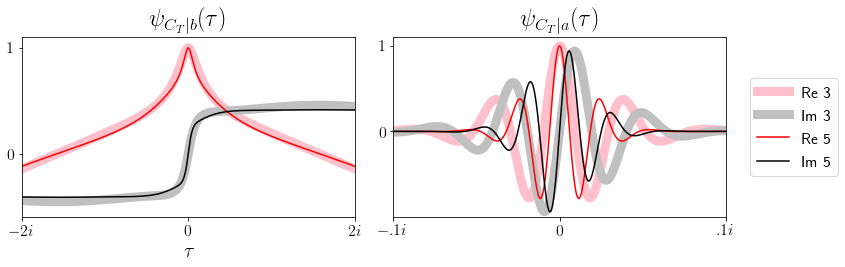

In [16]:
with np.load("analytical_3_5.npz") as data:
    CCFa3 = data['CCFa3']; CCFb3 = data['CCFb3']; 
    CCFa5 = data['CCFa5']; CCFb5 = data['CCFb5']; tau = data['tau']
    
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(np.imag(tau),np.real(CCFb3),'pink',lw=9)
plt.plot(np.imag(tau),np.imag(CCFb3),'silver',lw=9)
plt.plot(np.imag(tau),np.real(CCFb5),'r-')
plt.plot(np.imag(tau),np.imag(CCFb5),'k-')
plt.xlim([-2,2]); plt.xticks([-2,0,2],[r'$-2i$',r'$0$',r'$2i$']); plt.ylim([-.6,1.1]); plt.yticks([0,1])
plt.title(r'$\psi_{C_T|b}(\tau)$',fontsize=24,pad=13)
plt.xlabel(r'$\tau$',fontsize=20)

plt.subplot(1,2,2)
plt.plot(np.imag(tau),np.real(CCFa3),'pink',lw=9,label='Re 3')
plt.plot(np.imag(tau),np.imag(CCFa3),'silver',lw=9,label='Im 3')
plt.plot(np.imag(tau),np.real(CCFa5),'r-',label='Re 5')
plt.plot(np.imag(tau),np.imag(CCFa5),'k-',label='Im 5')
plt.xlim([-.1,.1]); plt.xticks([-.1,0,.1],[r'$-.1i$',r'$0$',r'$.1i$']); plt.ylim([-1,1.1]); plt.yticks([0,1])
plt.title(r'$\psi_{C_T|a}(\tau)$',fontsize=24,pad=13)
plt.legend(loc='center left',bbox_to_anchor=(1.05,.5));

plt.tight_layout()
plt.savefig('partitions.pdf')